In [13]:
import sqlite3 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
conn = sqlite3.connect('C:\\Users\ChristopherHaack\Downloads\soccer\database.sqlite')

c = conn.cursor()

def getLeagueIds():
    statement = '''select id, name from League'''
    c.execute(statement)
    leagueInfo = c.fetchall()
    return leagueInfo
def getSeasonInfo(season, league_id):
    statement = '''select stage,
    home_team_api_id,
    away_team_api_id, 
    home_team_goal, 
    away_team_goal
    from match where'''
    
    
    league_clause = " league_id = " + str(league_id)
    s_clause = " season = " +  "\"" + season + "\"" 
    o_clause = " order by stage"
    
    statement += league_clause + " and " + s_clause + o_clause
    c.execute(statement)
    gameInfo = c.fetchall()
    return gameInfo
def getResults(gameInfo):
    results = {}
    resList = []
    for game in gameInfo:
        if game[1] not in results:
            if game[3] == game[4]:
                results[game[1]] = [1]
            elif game[3] > game[4]:
                results[game[1]] = [3]
            else: 
                results[game[1]] = [0]
        else:
            if game[3] == game[4]:
                results[game[1]].append(1)
            elif game[3] > game[4]:
                results[game[1]].append(3)
            else: 
                results[game[1]].append(0)
        if game[2] not in results:
            if game[3] == game[4]:
                results[game[2]] = [1]
            elif game[3] < game[4]:
                results[game[2]] = [3]
            else: 
                results[game[2]] = [0]
        else:
            if game[3] == game[4]:
                results[game[2]].append(1)
            elif game[3] > game[4]:
                results[game[2]].append(0)
            else: 
                results[game[2]].append(3)
    for item, res in results.items():
        season = []
        season1 = []
        points = 0
        for game in res:
            points += game
            season.append(points)
            season1.append(game)
        tup = (season, game, item)
        resList.append(tup)
    return resList
def trainModel(trainSet, trainSeason):
    pass

def makePlots(resList, title, lname):
    resList1 = []
    
    for season in resList:
        resList1.append(season[0])
    x = range(1, len(resList1[0]) + 1)
    y = np.transpose(np.asarray(resList1))
    try:
        plt.plot(x, y)
        plt.title(title + lname)
        plt.xlabel('games played')
        plt.ylabel('points')
        plt.show()
        return 1
    except:
        return 0
def main():
    seasonList = []
    leagues = getLeagueIds()
    trainSet = []
    trainSeason = []
    testSet = []
    testSeason = []
    for i in range(2008, 2016):
            season = str(i) + "/" + str(i + 1)
            seasonList.append(season)
    for league, lName in leagues:
        for season in seasonList:
            gameInfo = getSeasonInfo(season, league)
            resList = getResults(gameInfo) 
            rVal = makePlots(resList, season, lName)
            if int(season[0:4]) < 2014 and rVal == 1:
                trainSet.append(resList)
                trainSeason.append((league, season))
            elif rVal == 1:
                testSet.append(resList)
                trainSeason.append((league, season))

In [9]:
print()

[(1, 'Belgium Jupiler League'), (1729, 'England Premier League'), (4769, 'France Ligue 1'), (7809, 'Germany 1. Bundesliga'), (10257, 'Italy Serie A'), (13274, 'Netherlands Eredivisie'), (15722, 'Poland Ekstraklasa'), (17642, 'Portugal Liga ZON Sagres'), (19694, 'Scotland Premier League'), (21518, 'Spain LIGA BBVA'), (24558, 'Switzerland Super League')]


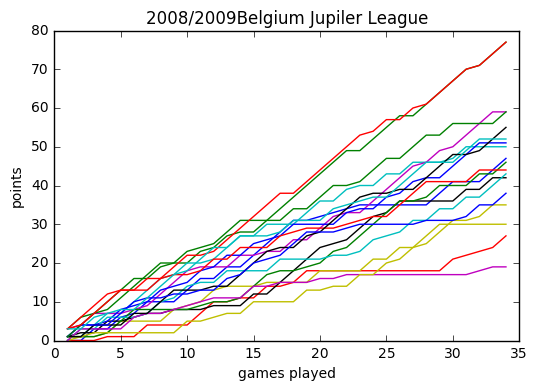

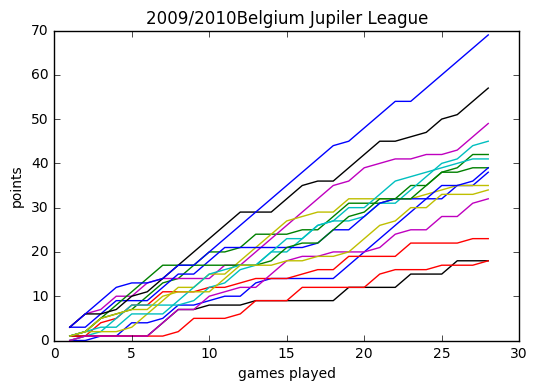

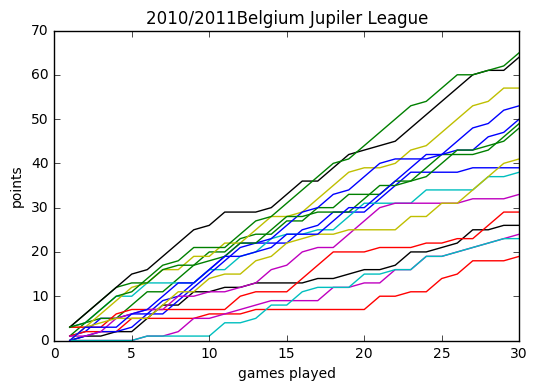

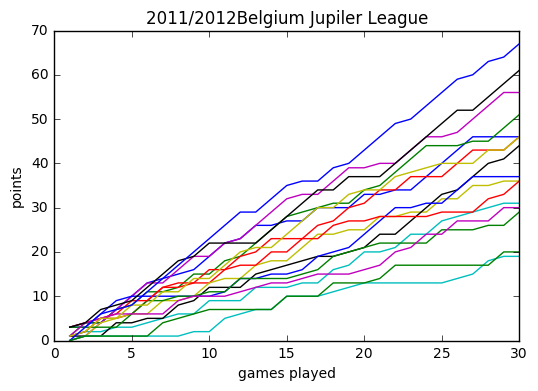

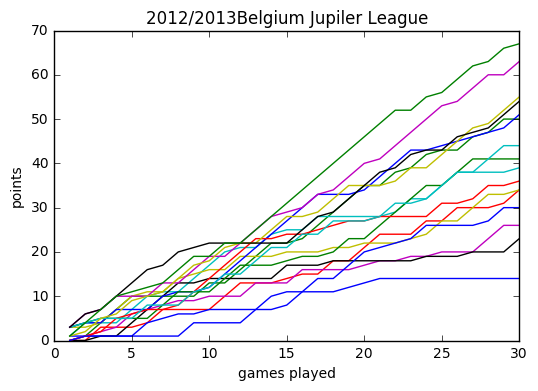

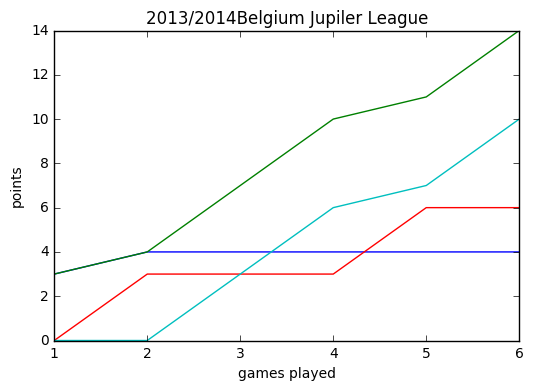

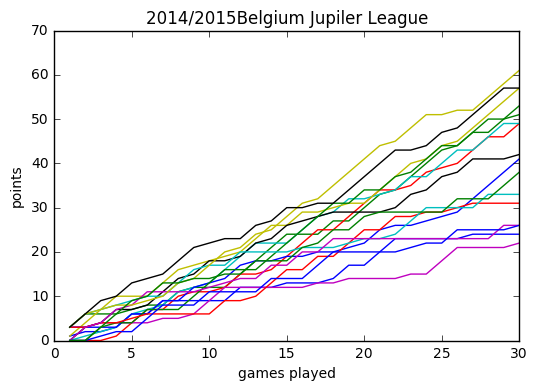

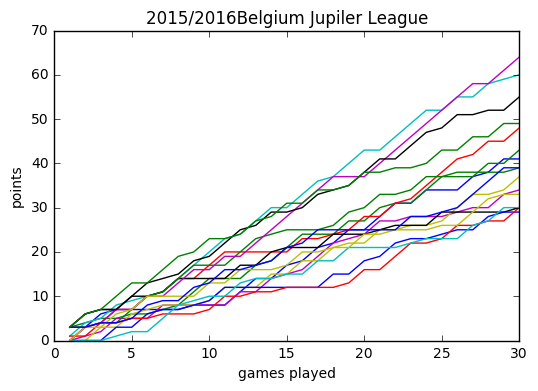

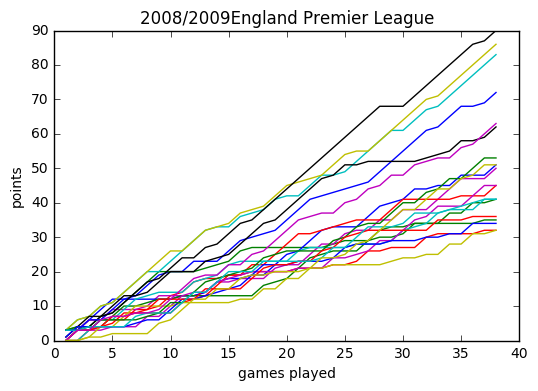

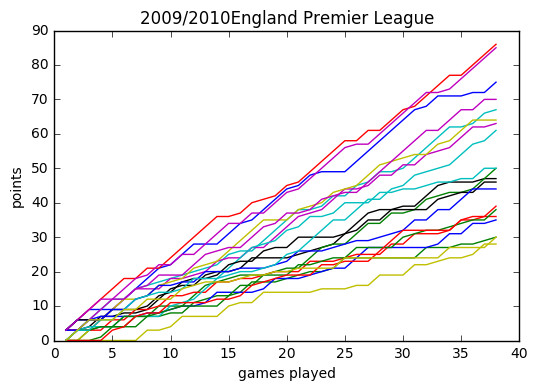

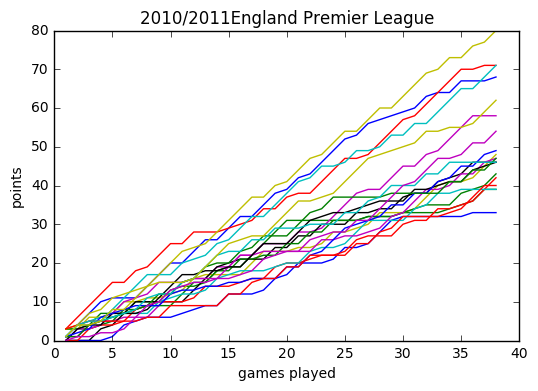

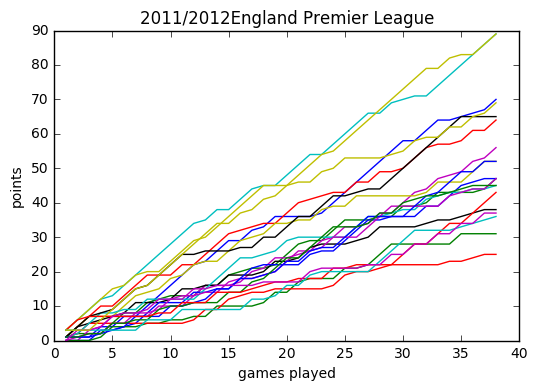

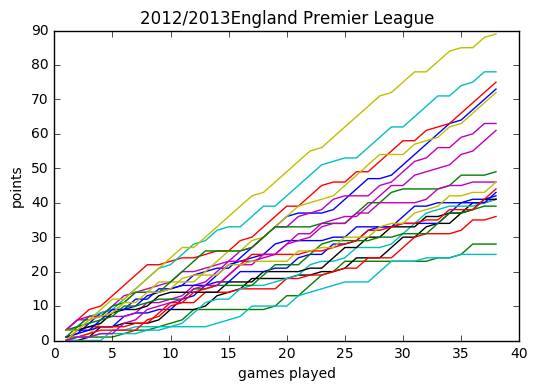

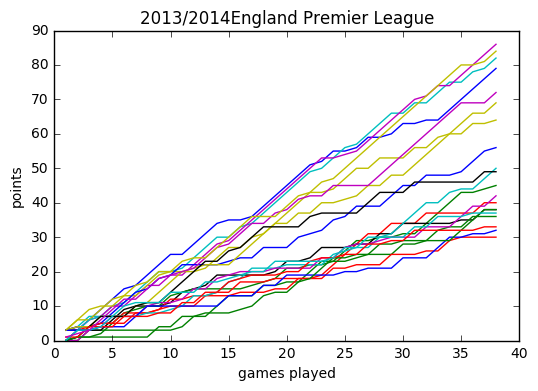

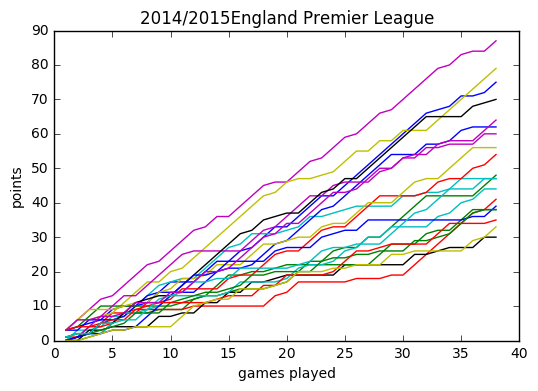

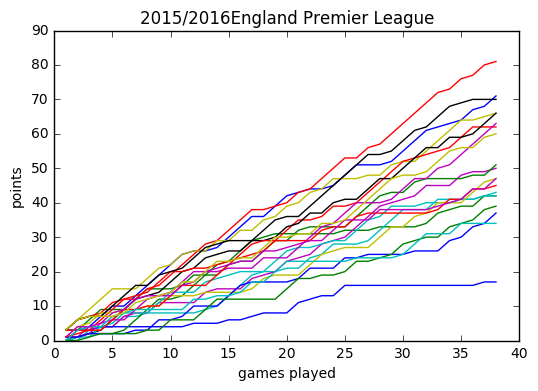

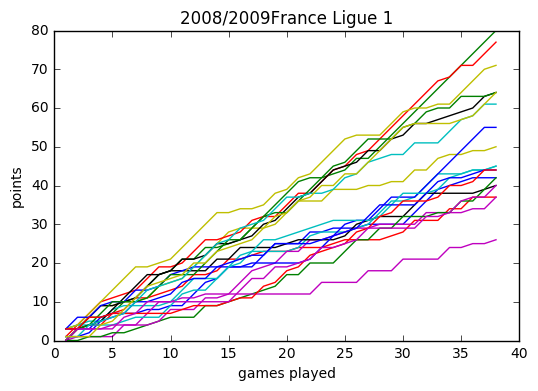

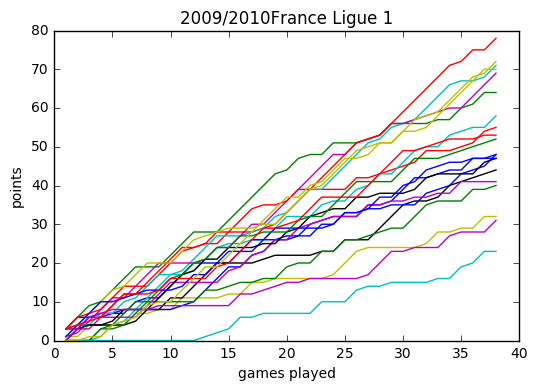

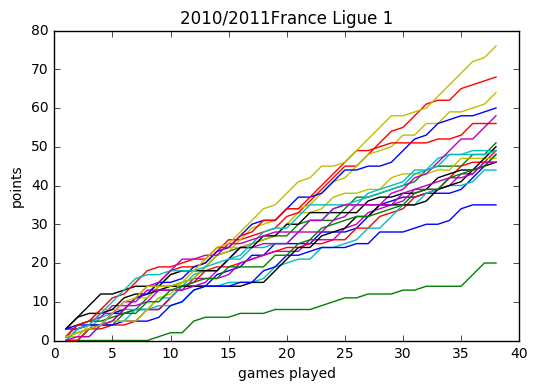

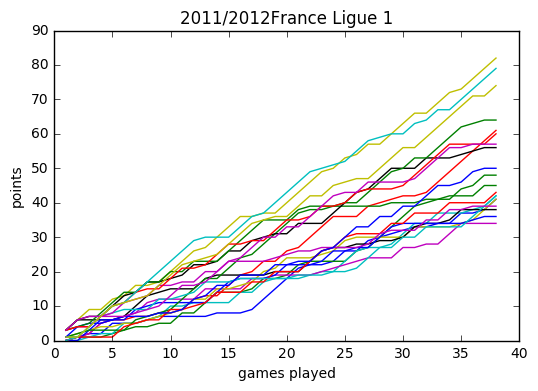

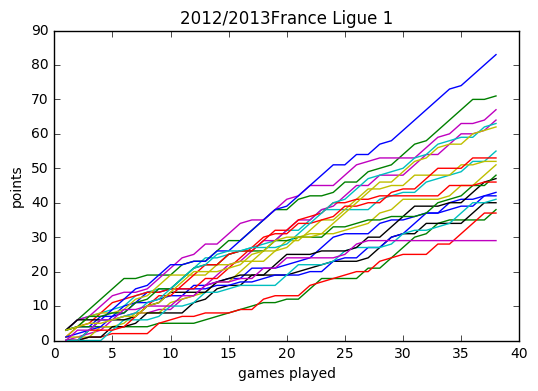

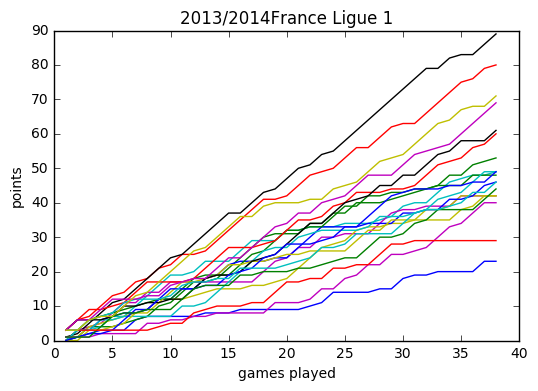

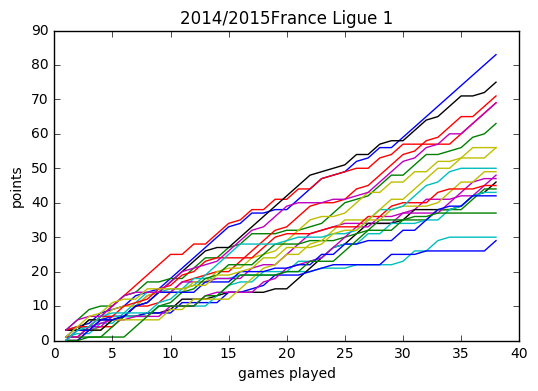

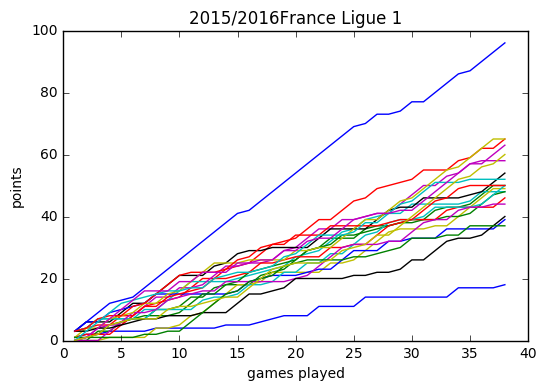

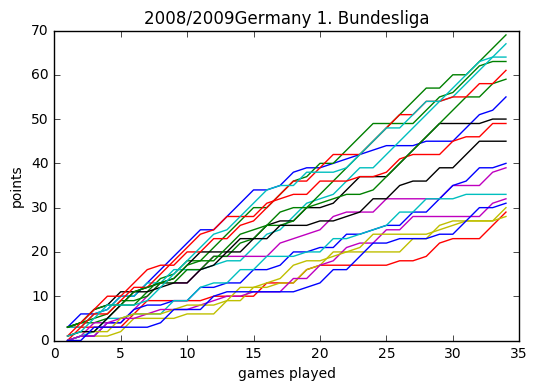

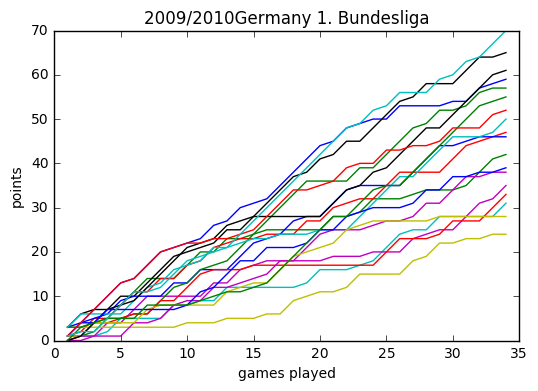

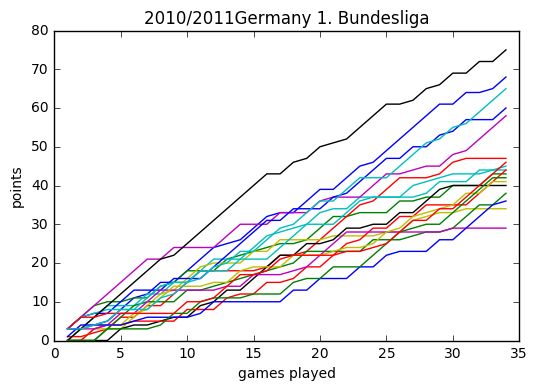

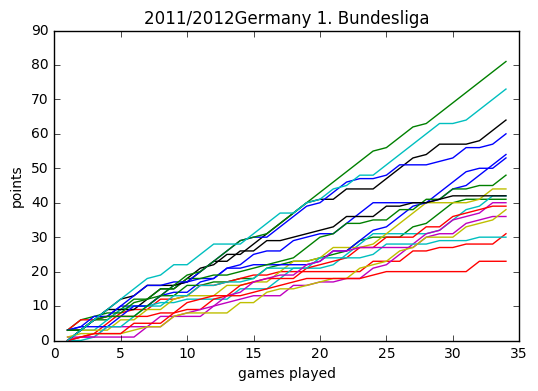

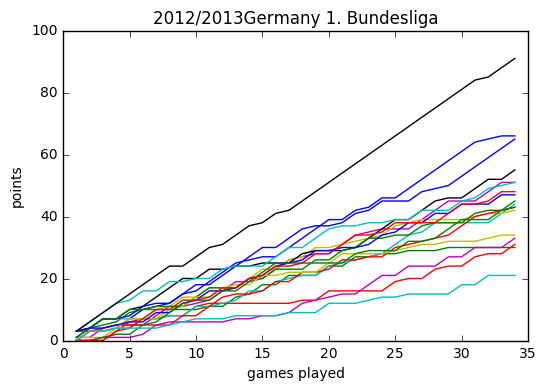

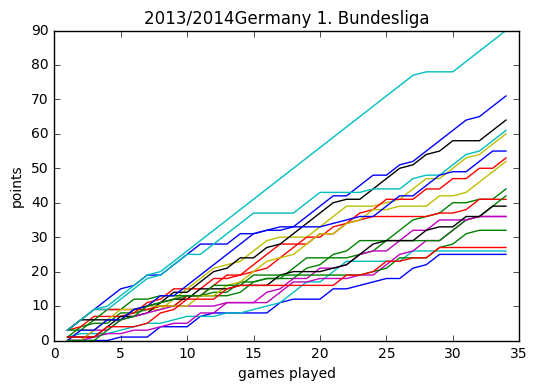

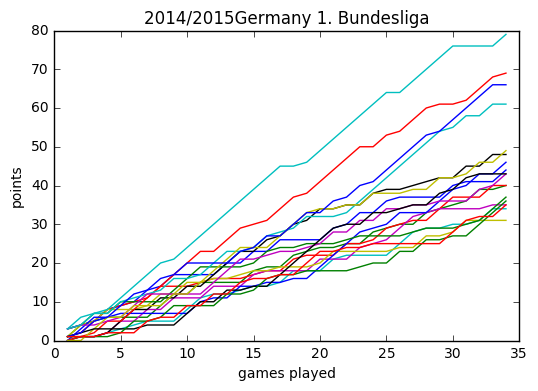

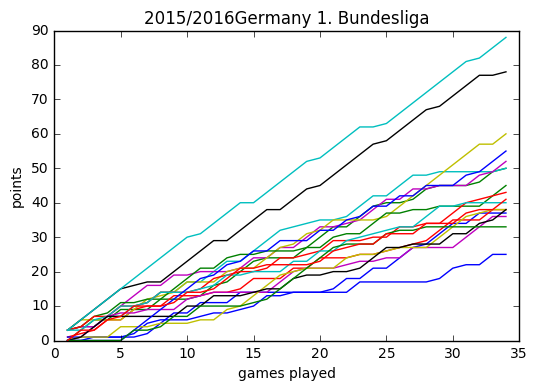

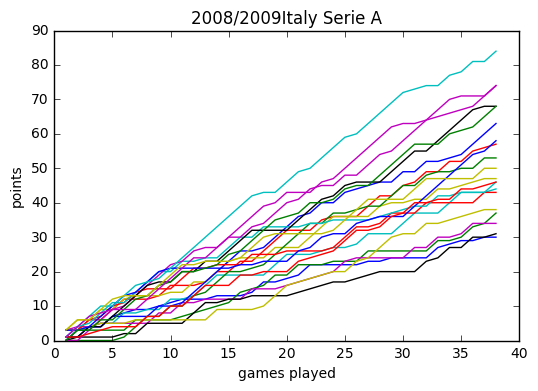

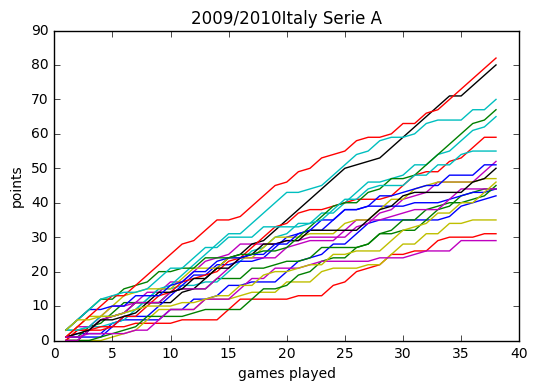

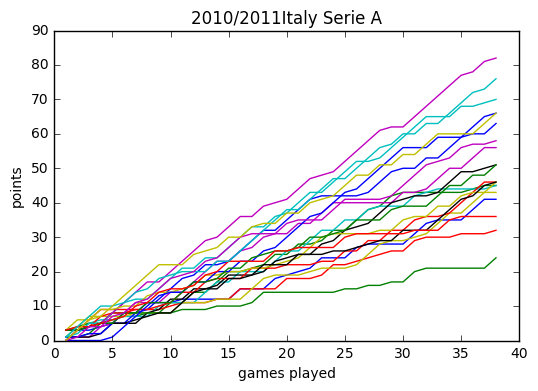

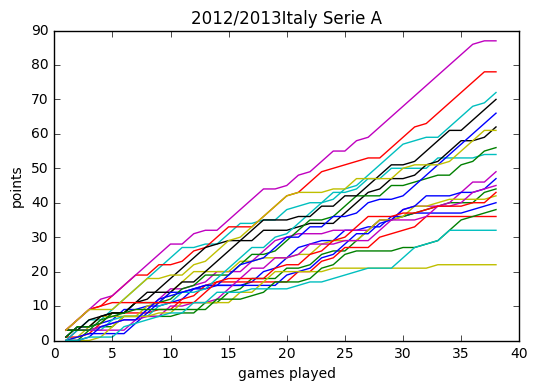

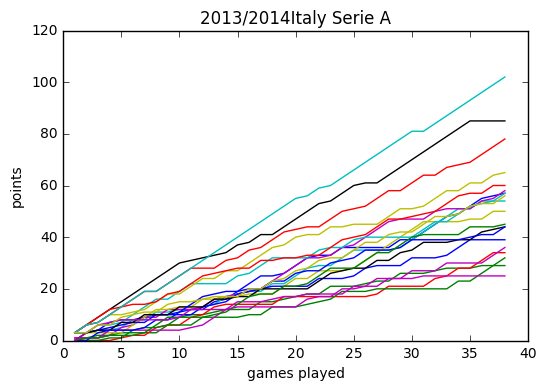

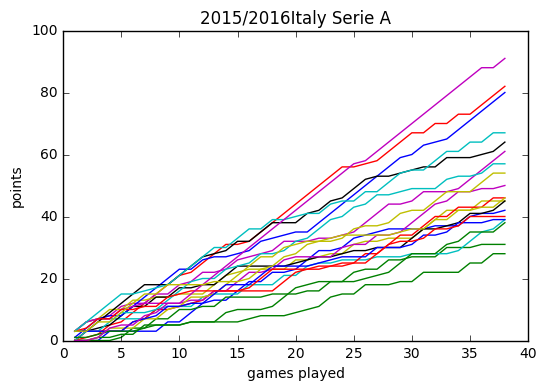

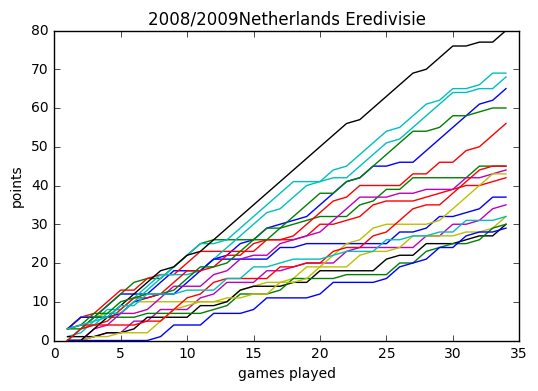

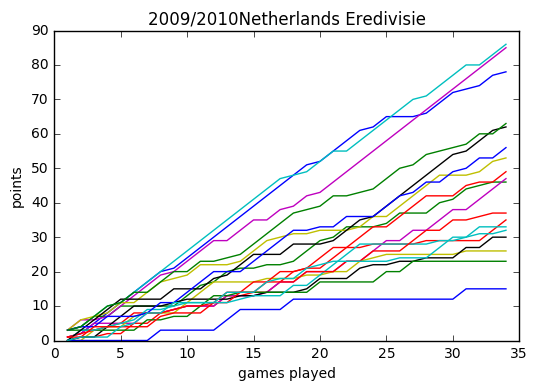

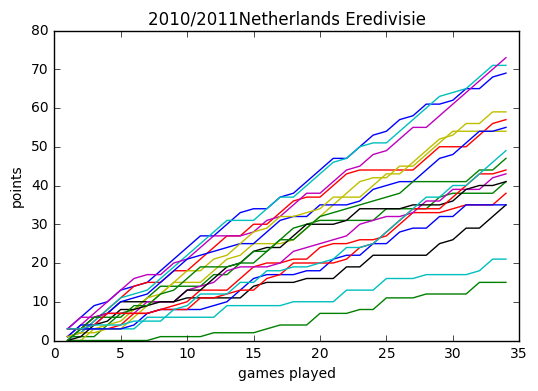

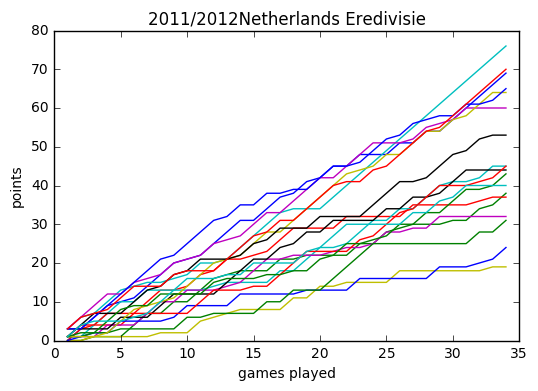

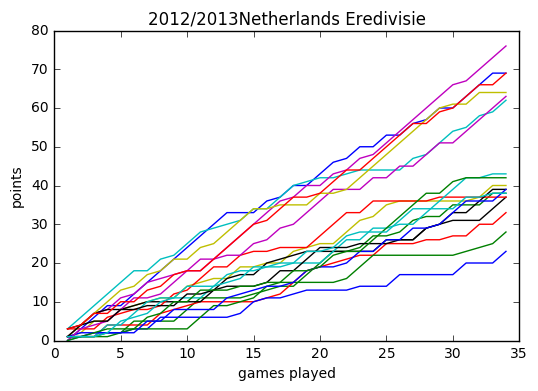

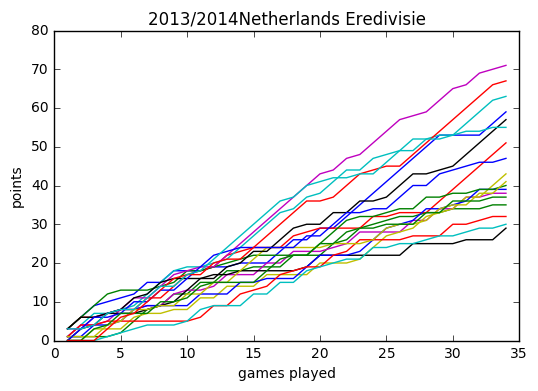

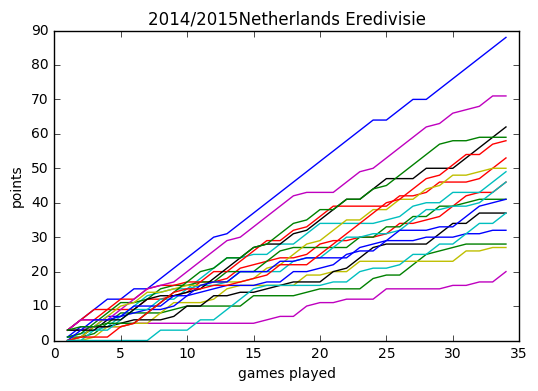

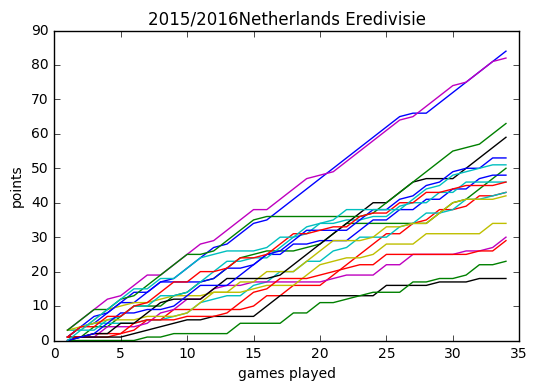

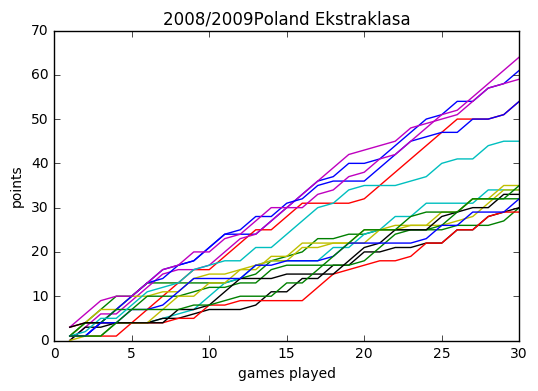

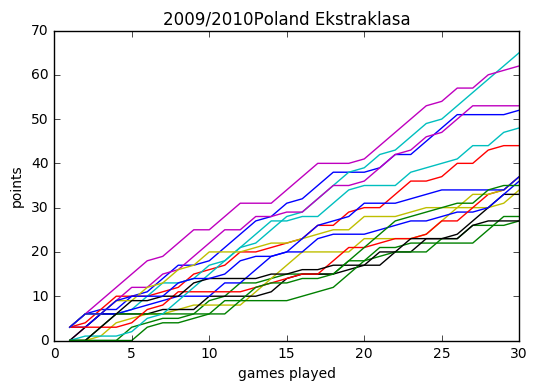

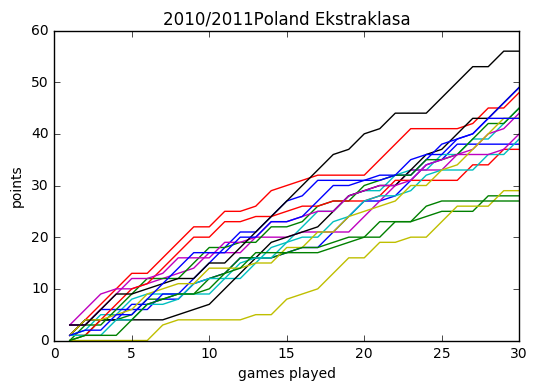

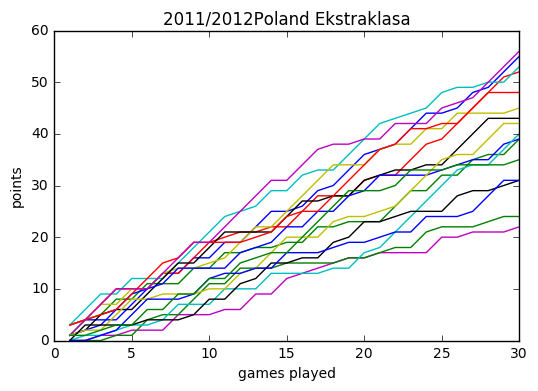

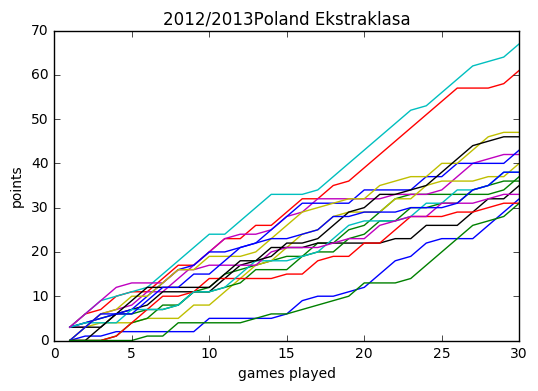

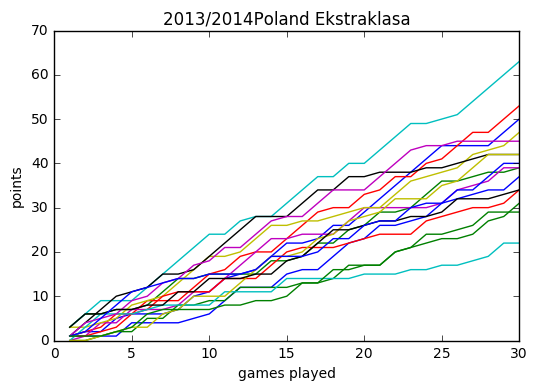

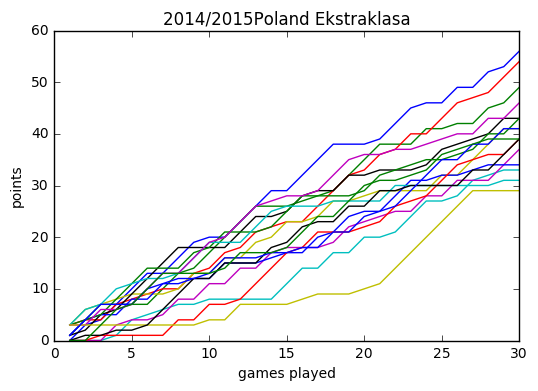

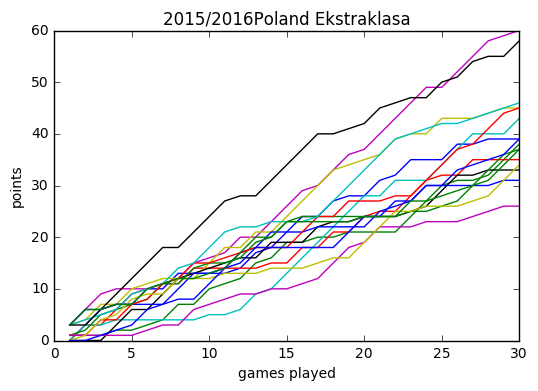

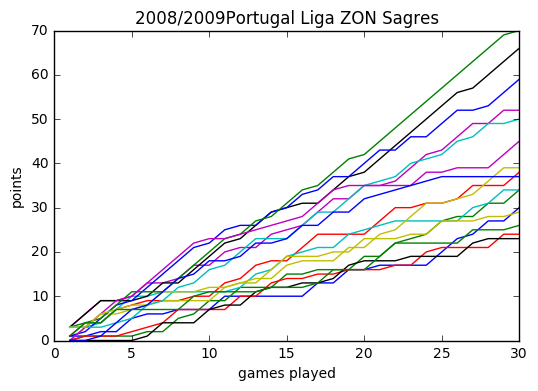

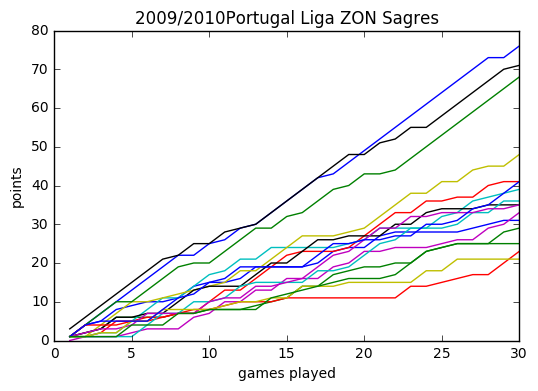

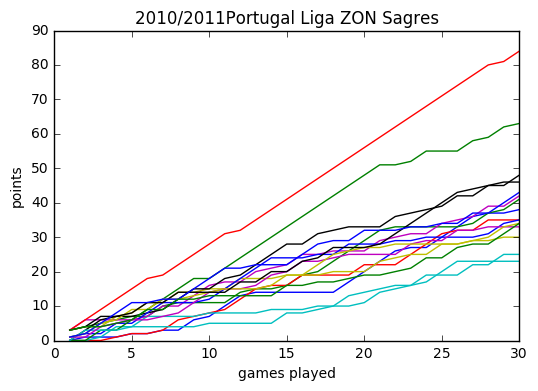

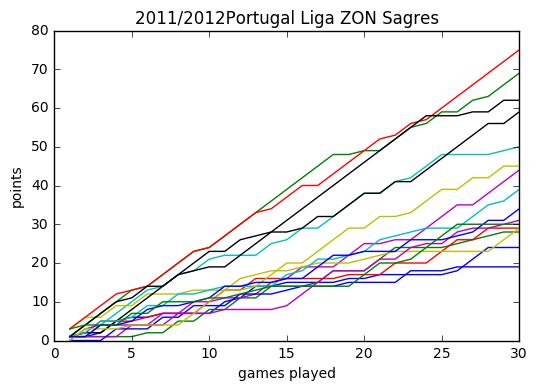

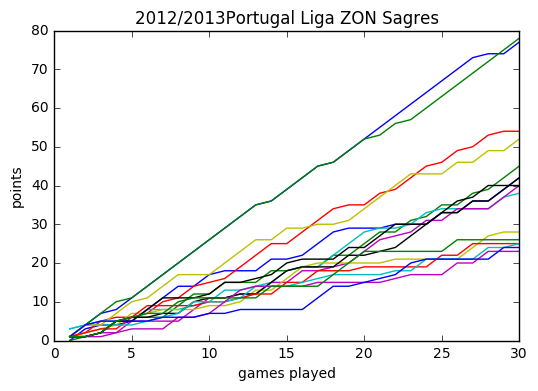

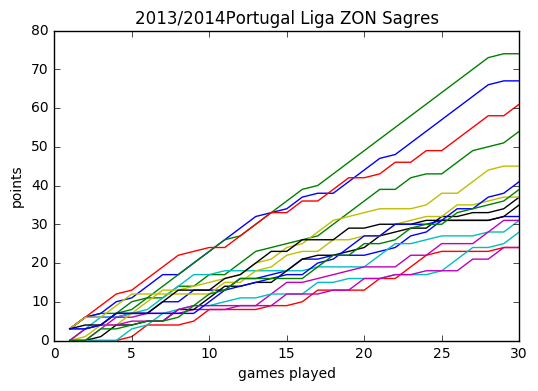

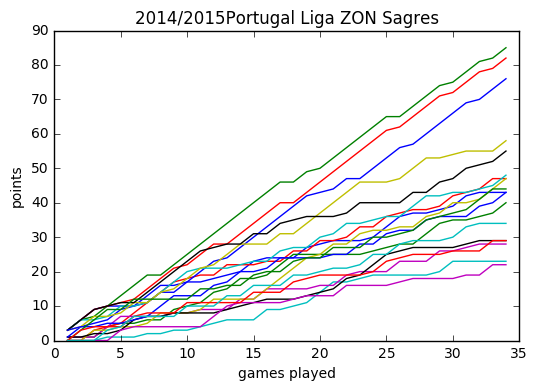

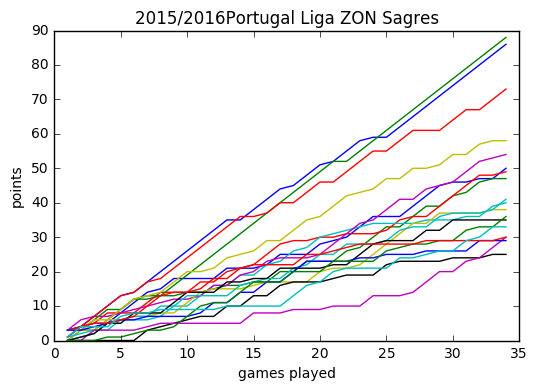

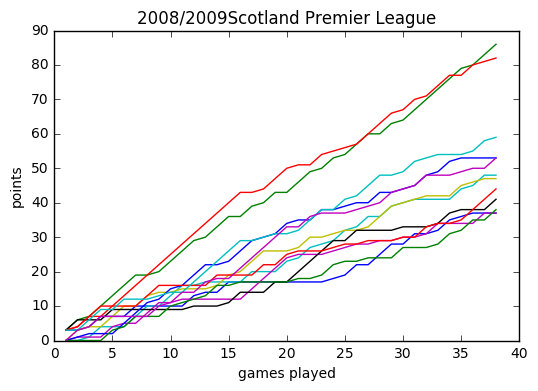

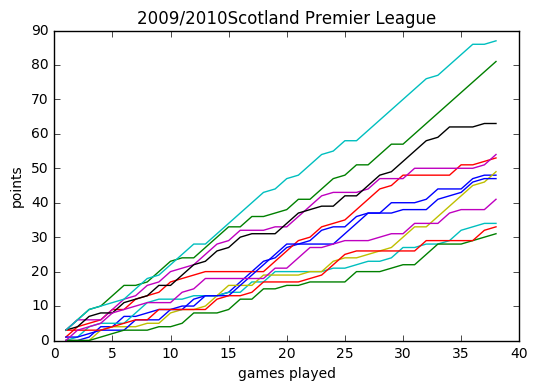

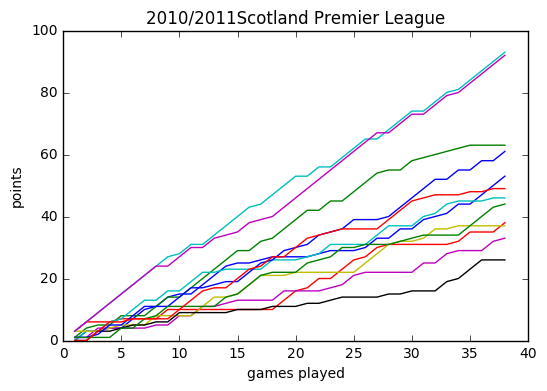

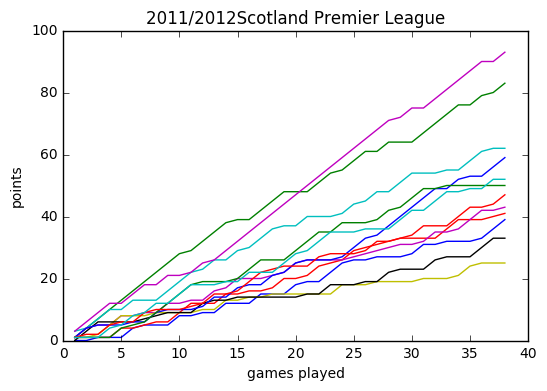

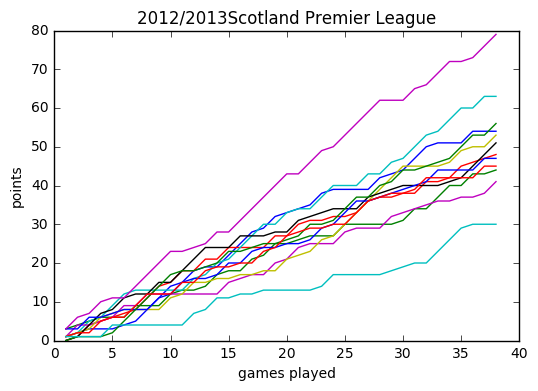

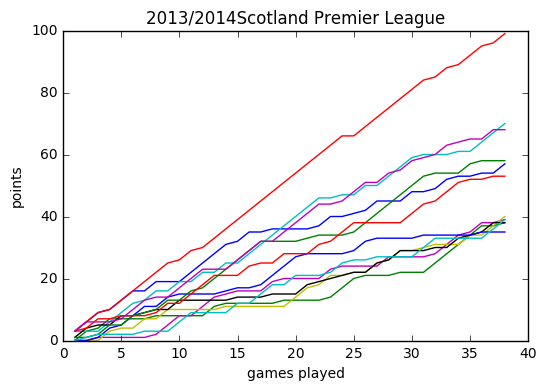

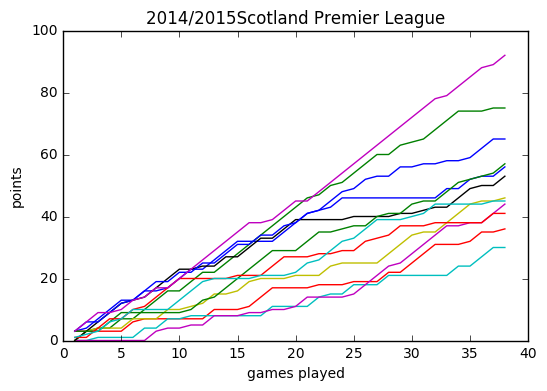

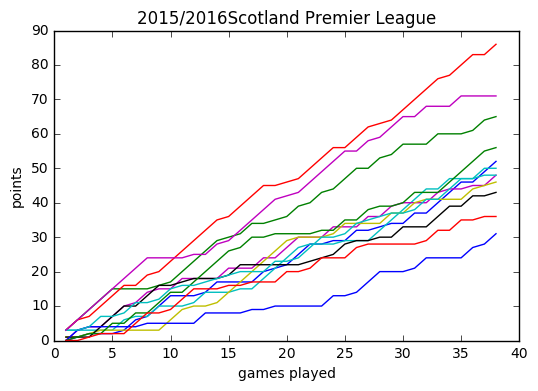

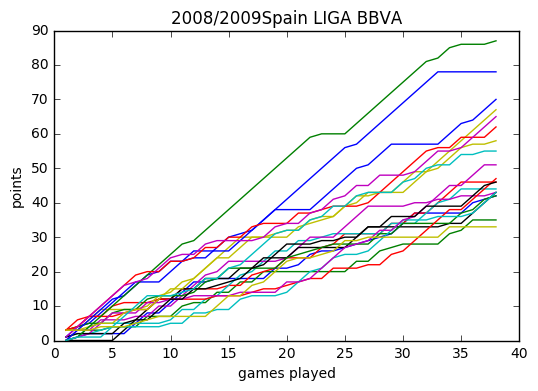

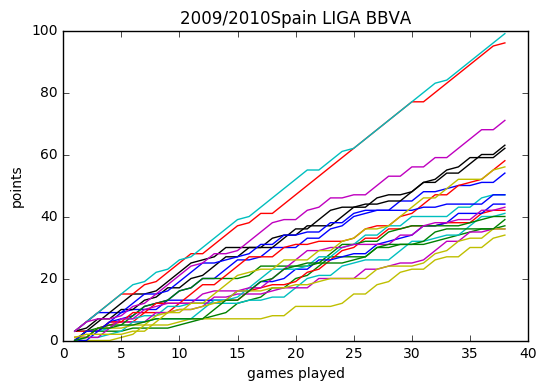

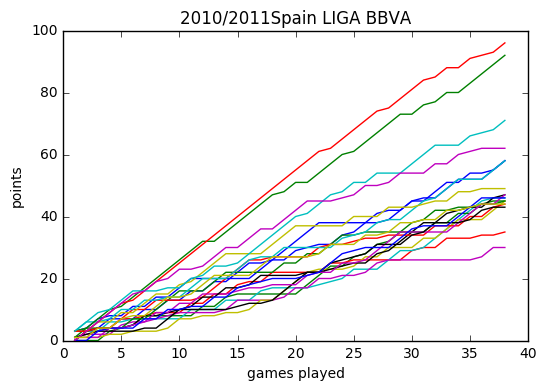

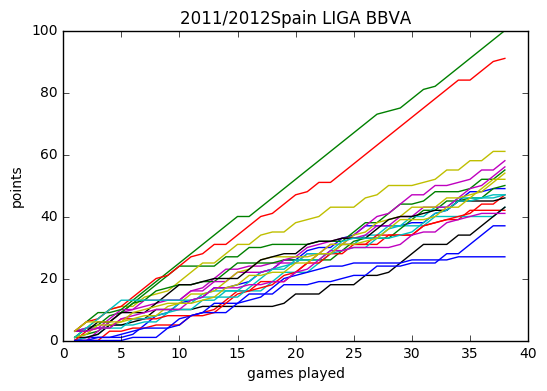

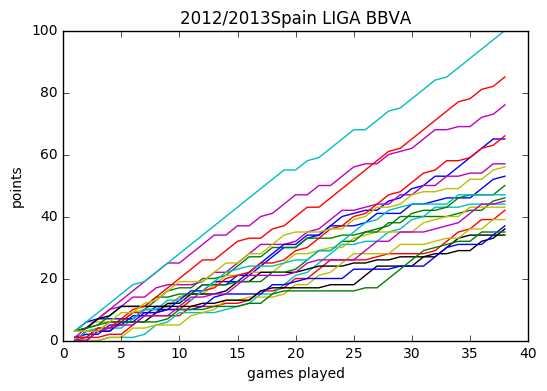

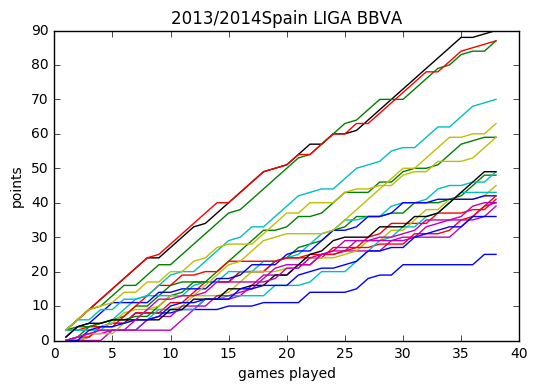

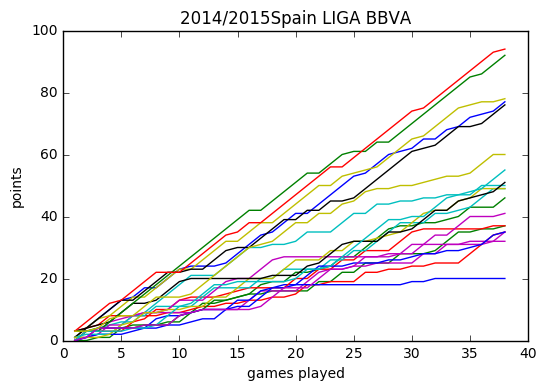

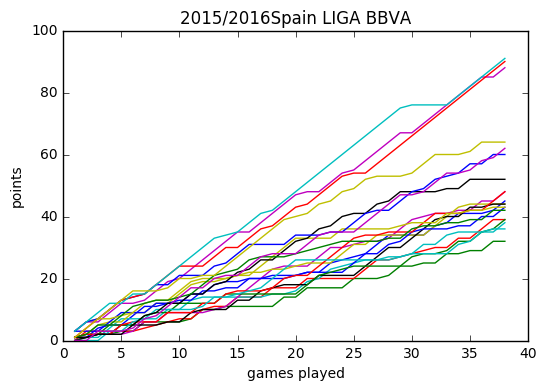

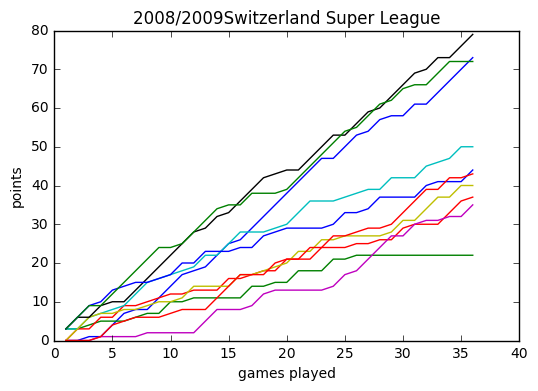

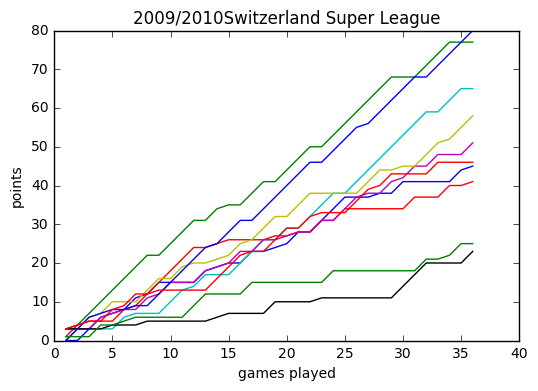

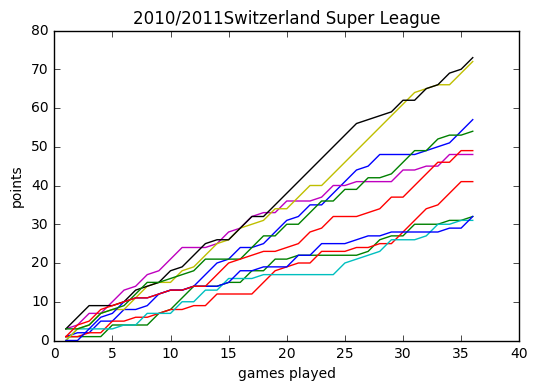

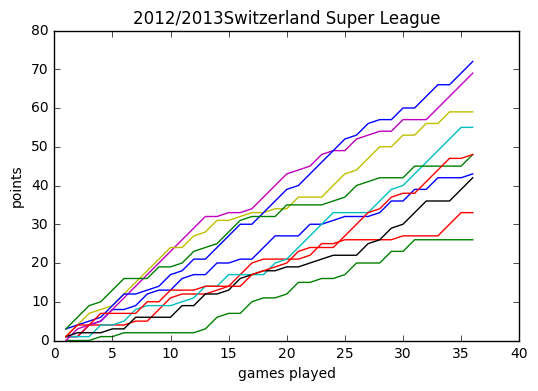

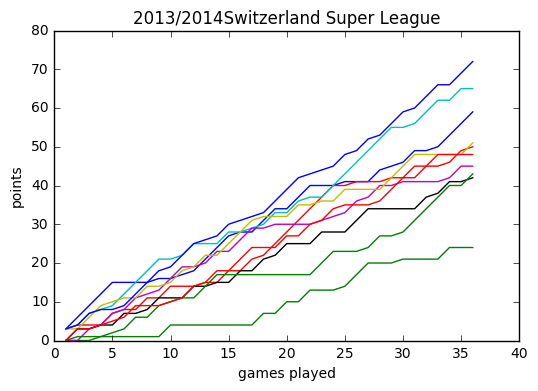

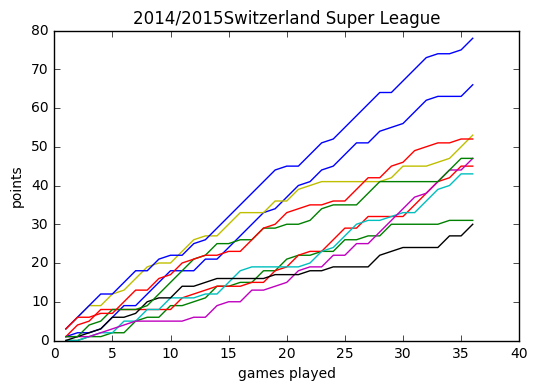

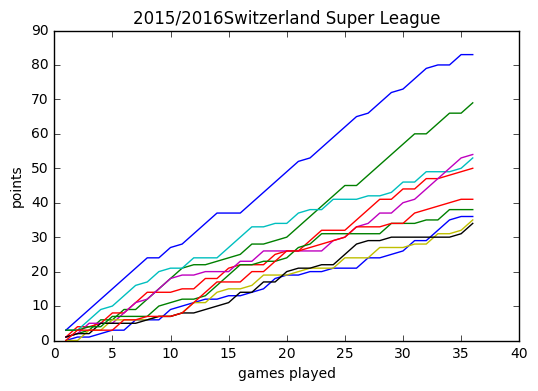

In [15]:
main()

In [10]:
statement = '''select *
    from match 
    where league_id = 1729
    limit 1 '''
c.execute(statement)
    
gInfo = c.fetchall()


[(1729, 1729, 1729, '2008/2009', 1, '2008-08-17 00:00:00', 489042, 10260, 10261, 1, 1, 1, 2, 4, 6, 8, 2, 4, 6, 8, 4, 6, 1, 2, 4, 6, 8, 2, 4, 6, 8, 5, 5, 1, 3, 3, 3, 3, 7, 7, 7, 7, 10, 10, 1, 3, 3, 3, 3, 7, 7, 7, 7, 9, 11, 30726, 30362, 30620, 30865, 32569, 24148, 34944, 30373, 24154, 24157, 30829, 24224, 25518, 24228, 30929, 29581, 38807, 40565, 30360, 33852, 34574, 37799, '<goal><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>406</event_incident_typefk><elapsed>22</elapsed><player2>38807</player2><subtype>header</subtype><player1>37799</player1><sortorder>5</sortorder><team>10261</team><id>378998</id><n>295</n><type>goal</type><goal_type>n</goal_type></value><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>393</event_incident_typefk><elapsed>24</elapsed><player2>24154</player2><subtype>shot</subtype><player1>24148</player1><sortorder>4</sortorder><team>10260</team><id>379019</id><n>298

In [23]:
statement = '''select *
    from player_attributes
    where player_api_id =  30726
    order by date
    '''
c.execute(statement)
    
gInfo = c.fetchall()
print(gInfo)

[(48278, 51539, 30726, '2007-02-22 00:00:00', 87, 89, 'right', 'y', 'es', 14, 12, 12, 47, 12, 13, 12, 88, 85, 32, 57, 61, 57, 76, 51, 39, 60, 73, 76, 11, 77, 78, 64, 40, 88, 1, 13, 11, 85, 91, 85, 94, 81), (48277, 51539, 30726, '2007-08-30 00:00:00', 85, 88, 'right', 'y', 'es', 20, 20, 20, 27, 12, 20, 12, 11, 85, 22, 52, 51, 57, 76, 51, 29, 60, 73, 76, 20, 77, 78, 64, 40, 73, 20, 33, 11, 83, 87, 85, 90, 81), (48276, 51539, 30726, '2008-08-30 00:00:00', 85, 89, 'right', 'y', 'es', 20, 20, 20, 27, 12, 20, 12, 11, 85, 22, 32, 41, 57, 68, 51, 29, 60, 63, 76, 20, 57, 78, 55, 40, 43, 20, 33, 11, 88, 86, 85, 88, 84), (48275, 51539, 30726, '2009-02-22 00:00:00', 85, 89, 'right', 'y', 'es', 20, 20, 20, 27, 12, 20, 12, 11, 85, 22, 32, 41, 57, 68, 51, 29, 60, 63, 76, 20, 57, 78, 55, 40, 43, 20, 33, 11, 84, 85, 85, 91, 84), (48274, 51539, 30726, '2009-08-30 00:00:00', 83, 89, 'right', 'y', 'es', 20, 20, 20, 27, 12, 20, 12, 11, 85, 22, 32, 41, 57, 68, 51, 29, 60, 63, 76, 20, 57, 78, 55, 40, 43, 20,

In [13]:
import sqlite3 
from datetime import datetime, time 
    
def getPlayerStats(player_ids, home, date ):
    s = []
    conn = sqlite3.connect('C:\\Users\ChristopherHaack\Downloads\soccer\database.sqlite')
    c = conn.cursor()
    if home == False:
        temp = player_ids[11:] + player_ids[:11]
        player_ids = temp
    for player in player_ids:
        ps = []
        statement = '''select * from player_attributes where '''
        p_statement = ''' player_api_id= ''' + str(player_ids)
        o_statement = ''' order by date'''
        statement += p_statement
        c.execute(statement)
        temp = c.fetchall()
        for pDate in temp:
            if pDate[5] > date:
                pS = pDate
        s.append(ps)
    return s
    
    
def gamesMapping(team_id, games):
    performance = []
    for game in games:
        p = []
        #adds 
        p.append(game[4])
        #checks to see if the team is home team and adds result, which is given by [points, goals scored, goals against]
        if game[7] == team_id:
            home = True
            p.append(game[8])
            if game[9] > game[10]:
                p.append(3)
            elif game[9] == game[10]:
                p.append(1)
            else:
                p.append(0)
            p.append(game[9])
            p.append(game[10])
        else:
            home = False
            p.append(game[7])
            if game[9] > game[10]:
                p.append(3)
            elif game[9] == game[10]:
                p.append(1)
            else:
                p.append(0)
            p.append(game[9])
            p.append(game[10])
        p += game[12:55]
        p += getPlayerStats(game[55:], home, game[5])
        p += game[77:85]
        performance.append(p)
    return performance


class season:
    def __init__(self, season = '2015/2016'):
        conn = sqlite3.connect('C:\\Users\ChristopherHaack\Downloads\soccer\database.sqlite')
        c = conn.cursor()
        season = '2015/2016'
        selectS = ''' select league_id from match '''
        whereS = ''' where season = ''' +  "\"" + season + "\"" 
        grouping = '''
         group by league_id
        having count(*) > 100'''
        statement = selectS + whereS + grouping
        c.execute(statement)
        leagues = c.fetchall()
        self.leagues = leagues
        self.season = season
class leagueSeason:
    def __init__(self, league_id = 1729, season = '2015/2016'):
        statement = '''select home_team_api_id
    from match where'''
        conn = sqlite3.connect('C:\\Users\ChristopherHaack\Downloads\soccer\database.sqlite')
        c = conn.cursor()
        league_clause = " league_id = " + str(league_id)
        s_clause = " season = " +  "\"" + season + "\"" 
        o_clause = " group by home_team_api_id"
        statement += league_clause + " and " + s_clause + o_clause
        c.execute(statement)
        teams = c.fetchall()
        self.teams = teams
        self.league_id = league_id
        self.season = season
''' this is the class that will store all the information about a given teams
performance in a season'''
class teamPerformance:
    
    def __init__(self, team_id = 10260, season = '2015/2016'):
        self.team_id = team_id
        conn = sqlite3.connect('C:\\Users\ChristopherHaack\Downloads\soccer\database.sqlite')
        c = conn.cursor()
        statement =    '''select *
        from match where'''
        h_clause = "home_team_api_id = " +str(team_id)
        a_clause = "away_team_api_id = " +str(team_id)
        o_clause = " order by stage"
        s_clause = " season = " +  "\"" + season + "\"" 
        statement +=  s_clause + 'and ( ' + h_clause + ' or ' + a_clause +' ) ' + o_clause
        c.execute(statement)
        games = c.fetchall()
        self.team_id = team_id
        performance = gamesMapping(self.team_id, games)
        self.performance = performance
    
c = teamPerformance()
print(c.performance)

NameError: name 'getPlayerStats' is not defined

In [23]:
import sqlite3 
''' this is the class that will store and be used as training and test data
it contains homea and away team api_id's the outcome of the game and when it took place and what stage
in the season it belonged too'''
class matchData

In [34]:
conn = sqlite3.connect('C:\\Users\ChristopherHaack\Downloads\soccer\database.sqlite')
c = conn.cursor()
team_id = 10260
season = "2015/2016"
statement =    ''' select *
from match where'''
h_clause = "home_team_api_id = " +str(team_id)
a_clause = "away_team_api_id = " +str(team_id)
o_clause = " order by stage"
league_clause = " league_id = " + str(league_id)
s_clause = " season = " +  "\"" + season + "\"" 
statement += league_clause + ' and ' + s_clause + 'and ( ' + h_clause + ' or ' + a_clause +' ) ' + o_clause
c.execute(statement)
performance = c.fetchall()
print(len(performance[0]))
print(performance[0][84])

115
<possession><value><comment>46</comment><stats><homepos>46</homepos><awaypos>54</awaypos></stats><event_incident_typefk>352</event_incident_typefk><elapsed>24</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>54</awaypos><homepos>46</homepos><n>104</n><type>special</type><id>4652378</id></value><value><comment>51</comment><stats><homepos>51</homepos><awaypos>49</awaypos></stats><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>49</awaypos><homepos>51</homepos><n>175</n><type>special</type><id>4652477</id></value><value><comment>50</comment><stats><homepos>50</homepos><awaypos>50</awaypos></stats><event_incident_typefk>352</event_incident_typefk><elapsed>67</elapsed><subtype>possession</subtype><sortorder>2</sortorder><awaypos>50</awaypos><homepos>50</homepos><n>233</n><type>special</type><id>4652596</id></value><value><comment>51</comment><stats><homepos>51</homepos><awaypos>49</

In [32]:
a = [1, 2, 3, 4, 5]
print(a[1:3])

[2, 3]
